# Машинное обучение, ВМК МГУ

# Практическое задание 4. Optimal Control Reinforcement Learning

## Общая информация
Дата выдачи: 30.04.2024

Мягкий дедлайн: 15.05.2024 5:30 MSK

Жёсткий дедлайн: 22.05.2024 5:30 MSK

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимальная оценка за работу  — 10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-04-ocrl-Username.ipynb


Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.5 балла за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

## Задание 1 (4 балла): уравнения Рикатти для управления дроном.

Начнем с небольшой разминки: реализация классического алгоритма нахождения оптимального управления для двухмерного дрона. Его динамика уже реализована за вас в файле qudrotor.py. Кроме того, реализована также визуализация его управления.

В качестве описания текущего состояния предлагается использовать вектор из 6-ти элементов [x, dx, y, dy, theta, dtheta]:

*   x - координата центра дрона по x
*   dx - скорость центра дрона по x
*   y - координата центра дрона по y
*   dy - скорость центра дрона по y
*   theta - угол наклона относительно оси x
*   dtheta - угловая скорость

В качестве управления используем вектор из 2 элементов [u1, u2]:

*   u1 - сила тяги левого винта
*   u2 - сила тяги правого винта

Сила измеряется в ньютонах, прикладывается перпендикулярно линии, проведенной между двумя винтами.

#### Quadrotor module

In [131]:
####################
#                  #
# QUADROTOR MODULE #
#                  #
####################


import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mp
import matplotlib.animation as animation
import IPython


MASS = 0.600 # mass of the quadrotor
INERTIA = 0.15 # inertia of the quadrotor

LENGTH = 0.2 # length of the quadrotor

GRAVITY=9.81 #gravity constant

DELTA_T = 0.01 #integration step

NUMBER_STATES = 6 # number of states
NUMBER_CONTROLS = 2 # number of controls


def get_next_state(z,u):
    """
    Inputs:
    z: state of the quadrotor as a numpy array (x, vx, y, vy, theta, omega)
    u: control as a numpy array (u1, u2)

    Output:
    the new state of the quadrotor as a numpy array
    """
    x = z[0]
    vx = z[1]
    y = z[2]
    vy = z[3]
    theta = z[4]
    omega = z[5]

    dzdt = np.zeros([NUMBER_STATES,])
    dzdt[0] = vx
    dzdt[1] = (-(u[0] + u[1]) * np.sin(theta)) / MASS
    dzdt[2] = vy
    dzdt[3] = ((u[0] + u[1]) * np.cos(theta) - MASS * GRAVITY) / MASS
    dzdt[4] = omega
    dzdt[5] = (LENGTH * (u[0] - u[1])) / INERTIA

    z_next = z + dzdt * DELTA_T

    return z_next



def simulate(z0, controller, horizon_length, disturbance = False):
    """
    This function simulates the quadrotor for horizon_length steps from initial state z0

    Inputs:
    z0: the initial conditions of the quadrotor as a numpy array (x, vx, y, vy, theta, omega)
    controller: a function that takes a state z as argument and index i of the time step and returns a control u
    horizon_length: the horizon length

    disturbance: if True will generate a random push every seconds during the simulation

    Output:
    t[time_horizon+1] contains the simulation time
    z[4, time_horizon+1] and u[2, time_horizon] containing the time evolution of states and control
    """

    t = np.zeros([horizon_length+1,])
    z=np.empty([NUMBER_STATES, horizon_length+1])
    z[:,0] = z0
    u=np.zeros([NUMBER_CONTROLS, horizon_length])
    for i in range(horizon_length):
        u[:,i] = controller(z[:,i],i)
        z[:,i+1] = get_next_state(z[:,i], u[:,i])
        if disturbance and np.mod(i,100)==0:
            dist = np.zeros([NUMBER_STATES, ])
            dist[1::2] = np.random.uniform(-1.,1,(3,))
            z[:,i+1] += dist
        t[i+1] = t[i] + DELTA_T
    return t, z, u


def animate_robot(x, u, dt = 0.01):
    """
    This function makes an animation showing the behavior of the quadrotor
    takes as input the result of a simulation (with dt=0.01s)
    """

    min_dt = 0.1
    if(dt < min_dt):
        steps = int(min_dt/dt)
        use_dt = int(np.round(min_dt * 1000))
    else:
        steps = 1
        use_dt = int(np.round(dt * 1000))

    #what we need to plot
    plotx = x[:,::steps]
    plotx = plotx[:,:-1]
    plotu = u[:,::steps]

    fig = mp.figure.Figure(figsize=[8.5,8.5])
    mp.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-4,4], ylim=[-4,4])
    ax.grid()

    list_of_lines = []

    #create the robot
    # the main frame
    line, = ax.plot([], [], 'k', lw=6)
    list_of_lines.append(line)
    # the left propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the right propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the left thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)
    # the right thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)

    def _animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])

        theta = plotx[4,i]
        x = plotx[0,i]
        y = plotx[2,i]
        trans = np.array([[x,x],[y,y]])
        rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

        main_frame = np.array([[-LENGTH, LENGTH], [0,0]])
        main_frame = rot @ main_frame + trans

        left_propeller = np.array([[-1.3 * LENGTH, -0.7*LENGTH], [0.1,0.1]])
        left_propeller = rot @ left_propeller + trans

        right_propeller = np.array([[1.3 * LENGTH, 0.7*LENGTH], [0.1,0.1]])
        right_propeller = rot @ right_propeller + trans

        left_thrust = np.array([[LENGTH, LENGTH], [0.1, 0.1+plotu[0,i]*0.04]])
        left_thrust = rot @ left_thrust + trans

        right_thrust = np.array([[-LENGTH, -LENGTH], [0.1, 0.1+plotu[0,i]*0.04]])
        right_thrust = rot @ right_thrust + trans

        list_of_lines[0].set_data(main_frame[0,:], main_frame[1,:])
        list_of_lines[1].set_data(left_propeller[0,:], left_propeller[1,:])
        list_of_lines[2].set_data(right_propeller[0,:], right_propeller[1,:])
        list_of_lines[3].set_data(left_thrust[0,:], left_thrust[1,:])
        list_of_lines[4].set_data(right_thrust[0,:], right_thrust[1,:])

        return list_of_lines

    def _init():
        return _animate(0)


    ani = animation.FuncAnimation(fig, _animate, np.arange(0, len(plotx[0,:])),
        interval=use_dt, blit=True, init_func=_init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

#### Main Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import quadrotor
import math
import sympy

Зададим параметы для дальнейшей работы:

In [3]:
m = 0.6 #масса дрона
r = 0.2 #длина дрона от левого до правого винта
I = 0.15 #инерция
g = 9.81 #ускорение свободного падения
dt = 0.01 #временной шаг

**Задание 1 (0.2 балла):** для начала проверим что все хорошо работает нормально. Реализуйте две функции-контроллера и проверьте их работу. Функции должны принимать на вход текущее состояние и номер таймстепа. Выдавать функции должны управление.

Первая функция должна давать команду ничего не делать (то есть всегда выдавать нулевое управление)

Вторая должна заставлять дрон висеть в воздухе при условии что он появляется в правильном положении параллельно оси x.

In [4]:
def do_nothing_controller(state, i):
    u = np.zeros(2)
    return u

def stabilize_controller(state, i):
    u = np.array([m * g / 2, m * g / 2])
    return u

Проверим реализации. В первом случае дрон должен падать вниз, во втором - висеть в точке (0, 0).

In [5]:
N = 1000
x0 = np.zeros([NUMBER_STATES,])
t, x, u = simulate(x0, do_nothing_controller, N, disturbance = False)

animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAK6RtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAR
2WWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMA
ALcAGFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxS
MtmuF6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7
mL/93+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGhBm8hUCYOBwO6jk+VYPTf6/Du1ir31n7L5sf
JF40WvGjfPYQDhAEmwQVpHGUCqNKDUSWRVYyXlgcUxYw9XjhTz+vx76BgcaMJ4KVpVnwEfgUbpla
CSJxFPqKGwp3WlZZBOgJrXBhRrpbFmPW16yiB2HGdaE/rYVZrpQqE/NWlCVwLzFsSVXhaMhwyKlI
HYXCzI57g+OIMWaAJiq8F6w7jkIzR52fDWmpLT/JM4U8H7+45gKyAC4c1qQfVsAiIFyAW6QiI9Hk
dw68WuTxHsdyww/lwIPTQ7MVvHHHtpfxUdNiFUyWmZqWV7VkOX9wT/ALctZL9/HHrpULFYXSY3uo
NJdAY+l5o2AS0uadrYVwaLwg5OerXMFtKVwJp+X39oV15iORr5dKw2lPYWSNxcwzYtd0zWJpEg39
Uis56Jsw8DvRsbXL5iK7/33v4lx3oImHzOt17U+ygf0DHsVXRKwz4MmiqNn/FfjarzfsmPP57I39
hBcdpvMmOANtIf5878Y9CRjC3h4u8K+LH+zwaz5juMmnufyo0jRIYms51Od/FHaf1TUlft4MWLg/
Z2QK07aj77eMi89/axfRKDwC7UVhDeHd/aGrxomPbns+yhRzorcEsmpG/jyN8KW+YaLGhykWbCJ8
5PQn3+z3IRc3iyK/HoCCS4SghLXuT4Xkcp5sdfVDUwAAAwAAAwAAAwAABP4bZZQCtOCjdvG0Ajp4
M6ULjVCsreA+QcMDpOSHv8PDGxhqPuLpSCdb48V2sQmNXG8jiykKPROn141v1QAj+SaH0NiOWYp0
SBap1Hc/Nc4SwKR1avN51+EpTVOWS0JehbYNpAA8SnkQOC3gMXn/5y4mPYvPCF7Y4Ewgj8yfo6os
IPPr6B/86yjQIX1Xp8CWuMipwh3Ism8f/MzA8G5gGq2hZF4Fd6BEKBB2yyGjLBSEz6EvjnShkeBN
m7QuvDtN0MBt+VNPkTIpvDYSvFkGfqRHpK15DU8zPuxMSQDVEEkBtLJVvb/yKxAGkhPmh0KuJd4o
x/1I6Z/ntea4pUSAfJ3Ig2QoCUL72yAbYb20MxgBjz/KmykfgPmTiWtRmwpMZlTIemg5A3Dn54/g
AAADAAADAAADAAZBtjnpnYUmHKLkLbhvTk9IUHxj4SCCiGYjFxmG/GWAoNFjyaUKn+K5Sh6jP+E4
TZ0nN+XYOql399yhF71tPR7XZPofRlWC961c/QNpfHg0Nvzxp5hfhyxVroriVBJ6bBQL6LLKXMjJ
yjnFuU8rjwHyYwiY2wVNroBBbJN6EbsWwHwVtS/Wryx3W6Eodm6415H3mcm0904FxwLhpyEKA6wQ
cVNVAr4dxtycSK3OBm4Xa3UxXCcqgaMZI0mJpemFzlj2WPgT7KfvDjONDKv3AZOxlVdupCBKfG/e
mZp+eScFGOuSPJPEV9+7htPjKyug/bLN87KA577H+ta5sgauEU4vitkMx6NEex4GIwAv8AIV1qKI
W1WPz4bm+1hJNAAwq3DB2f5JiGmRlJjRMrge+srzv+h25FVGZUxV4n3fxe/47oCEL5nBK21GE6SX
lZ3zwcID2b+1G6eGsRJg6xgFYh6+BJHm6CWeoUXjeCO3pv1jVG0IEIJH7AAAAwAAAwAAEl5eTDIw
Ffm1Wh+UHbjmv9W4AC32tyIA3ya2iVkGUXR9Ant3/R9L5IaYTtZnv9OCHpCMVkuEvU+Cv6yDpXt+
Va29EwLIX3B2bbb6dLBzf+Z6Pm2jftBpzk7OCZl0kNsKBfJq3y2gUD8Ys4+NFVmbAyKW7STfudI9
3zNCOzpklb4WGSqa6UcK6lbt6tgSMsSEjmztxAlvy7U0tPWdKj6SriPlWmyA+YUPLdZ2kbyFUESK
1jn58Jppc/1JKtMhQ3Kw19/s49nooXyxlts7tH6NjQOJjav0o3Ln462C6Pw6DSsjnn5EY5E+JfVW
VGl0efSdf9KGBsg1n3Wj0mZqzqWmcVPMt+AHOO35Q0mhlcVgwiomup8bbZAi7mGH22GsY2NDwO3I
V4349adJCWE60O9wBVQLVlhBvqohpVJ6kpV2OyTHN6Dn8se4ydBD2ey2+HJu2qEheiMrqjqXIC/Z
3BRp5fdF6sqgSQukqeoq/Mi1Vpx5fJNdgLoBF+6E6TT06PygLEB5yZqaLsCtG+kRVCWDcTyoFP8t
cWHDapO34yQ4A0iXh/wMfHKFmOE8RhALDY81HosnY5Gd8RK9EgpBxV6lOSPG67D/JyF+7sUSf8f/
5EJTdrd1NmE7GHxV4SJfWYLBsN8a7ZyrgOMSPkAMawNGXzXWfgP6GjQqsEXW+NEXfbOJBgEpL3za
61rzo1Upznm/VWaRPn/jyC2URbjCoi0hboAAACA9oTp+6Fl7JiaBjUY1gAAAAwADuVCxkBogbkLq
RMxLcweZAxYPV4xVZykAQ0uJJGaWskZ70uwgSJNnW/h51ut6SqiRzXNO7dYBFr3AfA+4f5m6B/yQ
DlVL80l1w3MqiA/8mRT5v5Ql2LrlhVRb4I5/ouvdz+k7wHDzu2qz3YUSXws6ZOPYXxGnavqRwnZP
08BlS/tv10Spys5JisJce0iVO8VxiDqj1OacmjrCAoNF0DrMcK9v/dMPhBGsCE7fPOy/2KIA45OP
MMn+ngZJjCCtm+PkCNN4x

In [6]:
N = 1000
x0 = np.zeros([NUMBER_STATES,])
t, x, u = simulate(x0, stabilize_controller, N, disturbance = False)

animate_robot(x, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAJEptZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAT
DGWIhAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMA
ALeAF7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94o
R2YuE9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7
mRH+hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R
1F5rhvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mg
phZWihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2F
wsyOe4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid
5USBnE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89
Llvg2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc
9E2YeB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gz
yqDB70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUt
UYOAR+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wo
hx/Pu/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXi
fhQCOngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4ulIJ1vjqnaxCY1cbyOLKQo2zlUgccI4DniJcIca
uaKHoL4aQ3eUxrR2twlwUjdaywXJ2epWD5WXUsnVAhBQA6jAWropzzy+/3Pu97VBvhQGDq2isqTW
umY21n9P9d7r4TP4SNkcb3QLJoQ9ntxVldBmI26m0b3dMSa8826KwuA1lJYLVhWhNV3t450oZHgT
Zu1YXqq/eoQ3FIijSJkU3hsJXiyDT1nWen4lMsYYyN36JIBqiCSA2rcOqD/4FX7Brknzx+tUpMWo
x/1I6Z/nteagpVcAfJ4uNBiLA04C7ZANsHPLowEBFR/lXZ4VehoU4xcE/62N8+wdyZ1VewED+oKA
ZRLIEgAA3bu5Zg/74qhAIkTISSAB8kskQgA35TB2gIKEZER6+vJByi5C24b05PSFBxPk0ggohmIx
cZhvmlgKDRY8mlCqHxoN4PUY7ZPKbOk5vy7B1Uu7GcGJc13C1nLDMmm5lql6zYwjfgeKXxa/cxp0
bxEGozGQg3B2p3pYoioOMJiHGxqMcf8s0O/bFdRhExtgy5tmyC2Sb0QeMB8FC8Y+GTe7qaWcIfpR
muxhpvfOzZ+t7AFi3q9tvn/evAVf29OS3RAmoOHfxnrAADCfr+kuwOihZkQiiTOygOe9zKgXLDJ2
yTYIwRmkqZKS89J8llElbpLdXh9gskYp09Jtuyx9xb8cd8WcC5xxp8H1zEME0xrsZR1sgkjcRkcf
XSkOXqZZ/X8n14JzDW3xjl763IrsvmRYHzCU2v5v6/yQjE7zfHWKgxW+JYpywLYZlTFXifd/F7/j
ugIUd3m2CA3RDSHOjVjtEGOkN2igtMXOug1R7bcVQv78G4+6OE42WAkpy04f8SjbFaspwfu+DgAA
Osc1Edq/HkAABJW+zqgTNhoAWKvkNqpPo6JAWQa+rvsxV2m0CiumggUCJnzymG7gQLupfRCZAeDc
oTNIG4c3eYq466vi9E+IrYHYp6bP+YoH6jqcJ+2dIaMSDHw/7OtM2EFlTG1GfmtR5U8N9WPpVK3k
NV3396yA5QMC9SBo1ZRrxdqG9GQSAZ1WJhJEj1cyDV0YX3chs8oTfRAirxzzwnSg+f4ZXtHvm/+R
RUCpfimG5AXr3lZ/68GRHKYf75OS1TCvd+GtyZQRBSKZ6XPz4EZH+M/diSM4JdDCVeho6tcDwlXA
mikencN2ieMwC/jzrPPpIJ3OgrrNBopOH2A0jOMfOmbwBTD5eEzEKPlF6Q8/o/QPWU5ucLbyieGd
rLIVTPW1rbt0uxW02H7GzWbwrunfDfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6G
sATmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT
2UG0TB3f81JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJu
mpOs9mtZnz3zJvzztARyhFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQA
QZqMTbxEOjWUOWuRI6cVmq3X/Og9ALhyZWjbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoy
ndLW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30t
kvfWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwO15X5qosnY5Gd+5
0KiNrqKQyNZI8bsBmnJHHU485l8f/3P6LmkN+I+SxqZ5ZU80nDY0owoi2yXg8Yu6cDhQpZSlqXZY
9QghuNgXvklyRBRS8/Q0B

**Задание 2 (1.5 баллов):**Как вы помните, уравнения Рикатти как и базовый алгоритм ПМП удобнее всего реализовывать для задачи типа LQR. Однако, она имеет 2 требования, которые не выполняются в нашей задаче.

Требование 1: динамика должна выглядеть следующим образом:
$x_{k+1} = Ax_k + Bu_k$.

Требование 2: функция потерь должна выглядеть следующим образом:
$cost(x,u) = x^TQx + uRu$


Для нашей задачи выписать подобные матрицы в общем случае невозможно. Попробуем нашу динамику аппроксимировать линейной в каждой точке.

Требование 2 не выполняется, так как нам в теории хочется чтобы дрон оказался в конкретной точке. То есть, хочется минимизировать такой лосс: $cost(x,u) = (x-x^*)^TQ(x-x^*) + (u-u^*)^TR(u-u^*)$. Самый простой выход в нашем случае - решать задачу в терминах расстояний до конечной точки (то есть, новый вектор наблюдений - $\overline{x} = (x-x^*), \overline{u}=(u-u^*)$

1. Выпишите аппроксимацию функции (пока без А и В, просто через приращения) $f(x,u)$, где $x_{n+1} = f(x_n, u_n)$. Keywords: второй закон Ньютона, линейное и угловое ускорение стержня, здравый смысл

2. С помощью разложения в ряд Тейлора в окрестности $x^*, u^*$ выведите функцию $\overline{f}: \overline{x}_{n+1} = \overline{f}(\overline{x}_{n}, \overline{u}_{n}) = A\overline{x}_{n} + B\overline{u}_{n}$

3. Запрограммируйте подсчет этих матриц

Выпишем аппроксимацию функции для пункта $1$.

Для простоты записи обозначим состояние дрона на шаге $n$ так:
$$z^{(n)} = \left( z^{(n)}_1 \ z^{(n)}_2 \ z^{(n)}_3 \ z^{(n)}_4 \ z^{(n)}_5 \ z^{(n)}_6 \right) $$
Из кода, реализующего динамику $\hat{f}$ из уравнения $\dfrac{dz}{dt} = \hat{f}(z, u)$, можно легко получить аппроксимацию Эйлера вида $z^{(n + 1)} = z^{(n)} + \hat{f}(z^{(n)}, u^{(n)}) \Delta t$. Из неё можно получить вид функции $f$: $f(z, u) = z + \hat{f}(z, u) \Delta t$

Функция $\hat{f}$ действует следующим образом:

$$\hat{f}(z, u) = \left( z_{2}, - \frac{(u_1 + u_2) \ sin(z_5)}{m}, z_4, \frac{(u_1 + u_2) \ cos(z_5) - mg}{m}, z_6, \frac{l(u_1 - u_2)}{I} \right)$$

Аппроксимация первого порядка функции $f$ через формулу Тейлора в окрестности $(x^*, u^*)$:

$$f(z, u) = f(z^*, u^*) + f_z(z^*, u^*)(z - z^*) + f_u(z^*, u^*)(u - u^*)$$

Введём новые переменные $\bar{z} = (z - z^*)$ и $\bar{u} = (u - u^*)$, а также

функцию $\bar{f}(\bar{z}, \bar{u}) = f(z^* + \bar{z}, u^* + \bar{u}) - f(z^*, u^*)$

Подставим полученную функцию в разложение Тейлора:

$$\bar{f}(\bar{z}, \bar{u}) = f_z(z^*, u^*)(z - z^*) + f_u(z^*, u^*)(u - u^*)$$

Отсюда легко получается следующее равенство:

$$\bar{z}^{(n + 1)} = \bar{f}(\bar{z}^{(n)}, \bar{u}^{(n)}) = f_z(z^*, u^*) \bar{z}^{(n)} + f_u(z^*, u^*) \bar{u}^{(n)} $$

Искомые матрицы имеют следующий вид:

$$A = f_z(z^*, u^*) = I + \hat{f}_z(z^*, u^*) \Delta t$$

$$B = f_u(z^*, u^*) = \hat{f}_u(z^*, u^*) \Delta t$$

Запишем вид $\hat{f}_z(z^*, u^*)$ и $ \hat{f}_u(z^*, u^*)$:

$$\hat{f}_z(z^*, u^*) = \begin{pmatrix}
    0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & - \frac{(u^*_1 + u^*_2) \ cos(z^*_5)}{m} & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & - \frac{(u^*_1 + u^*_2) \ sin(z^*_5)}{m} & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}$$

$$\hat{f}_u(z^*, u^*) = \begin{pmatrix}
    0 & 0 \\
    -\frac{sin(z^*_5)}{m} & -\frac{sin(z^*_5)}{m} \\
    0 & 0 \\
    \frac{cos(z^*_5)}{m} & \frac{cos(z^*_5)}{m} \\
    0 & 0 \\
    \frac{l}{I} & -\frac{l}{I}
\end{pmatrix}$$

Однако нормально возвращаться в исходную точку дрон начал только после замены $\frac{cos(z_5^*)}{m}$ в $\hat{f}_{u}(z^*, u^*)$ на $\frac{1}{m}$

In [144]:
def get_linearization(z, u):
    m = 0.6 #масса
    r = 0.2 #длина
    I = 0.15 #инерция
    g = 9.81 #ускорение свободного падения
    dt = 0.01 #временной промежуток

    fz = np.zeros((z.shape[0], z.shape[0]))
    fu = np.zeros((z.shape[0], u.shape[0]))

    fz[[0, 2, 4], [1, 3, 5]] = 1
    cos_part = - np.cos(z[4]) / m
    sin_part = - np.sin(z[4]) / m
    fz[1, 4] = cos_part.item() * (u[0] + u[1])
    fz[3, 4] = sin_part.item() * (u[0] + u[1])
    fu[[1, 1], [0, 1]] = sin_part
    fu[[3, 3], [0, 1]] = 1 / m
    fu[5, 0] = r / I
    fu[5, 1] = - r / I

    A = np.eye(z.shape[0]) + dt * fz
    B = fu * dt

    A[np.abs(A) < 1e-8] = 0
    B[np.abs(B) < 1e-8] = 0
    return A,B

In [104]:
get_linearization(np.array([0, 0, 0, 0, np.pi / 2, 0]), stabilize_controller(None, None))

(array([[ 1.    ,  0.01  ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  1.    ,  0.01  ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  1.    , -0.0981,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.01  ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ]]),
 array([[ 0.        ,  0.        ],
        [-0.01666667, -0.01666667],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.00666667, -0.00666667]]))

**Задание 2. (0.3 балла)**: теперь перейдем к оптимизируемому функционалу. На семинаре рассматривался функционал как сумма функций потерь для каждой точки.

Не забываем что для удобства вычислений задача решается для относительных состояний и управлений


Ограничим рассматриваемый горизонт 1000 шагами и сгенерируем целевые состояния для каждого момента времени

In [47]:
from copy import copy

In [136]:
xstar=[]
for i in range (0,1000):
    if i >=0 and i <= 450:
        goal=np.array([[3],[0],[3],[0],[0],[0]]) # хотим чтобы за первые 450 шагов он оказался в точке (3,3)
        xstar.append(copy(goal))
    if i>=451 and i <= 550:
        goal=np.array([[3],[0],[3],[0],[np.pi/2],[0]]) # теперь говорим ему встасть перпендикулярно оси х чтобы дестабилизировать свое положение
        xstar.append(copy(goal))
    if i>=551 and i <= 1000:
        goal=np.array([[0],[0],[0],[0],[0],[0]]) # говорим ему вернуться на исходную позицию
        xstar.append(copy(goal))
xstar = np.array(xstar).reshape(1000,6,).T
xstar.shape

(6, 1000)

По умолчанию мы хотим чтобы дрон висел стабильно в воздухе, поэтому $u^*$ - это управление-стабилизатор.

Реализуйте функцию подсчета потерь по формулам с семинара. $Q$ возьмите равной $I*10000, R = I*0.0001$

In [140]:
Q = np.eye(x.shape[0]) * 10000
R = np.eye(u.shape[0]) * 0.0001

# x has the size of (6, N), u has the size of (2, N)
def cost_function(x,u):
    cost = x.T @ Q @ x + u.T @ R @ u
    return np.trace(cost)

**Задание 3. (2 балла):** реализуйте полный прогон уравнений Рикатти для 1000 шагов. Вам понадобится получать матрицы A и B на каждом шаге для вычисления управления. Функция должна возвращать список из матриц K и P.

In [107]:
def back_Riccati(goal_state, goal_u, N):
    A, B = get_linearization(goal_state, goal_u)
    K = None
    P = Q
    for i in range(N):
        K = np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ A
        P = Q + A.T @ P @ (A - B @ K)

    K = np.array(K)
    P = np.array(P)
    return K, P

Реализуйте генерацию управления с помощью полученного массива матриц K. Помните что мы решаем задачу в терминах относительного состояния и аппроксимированных матриц A и B. Поэтому, к вычисленному по формулам с семинара управлению требуется прибавить стабилизатор.

In [137]:
u_star = stabilize_controller(None, None)

def riccati_controller(state, i):
    K, _ = back_Riccati(xstar[:, i], u_star, 200)
    u = -K @ (state - xstar[:, i]) + u_star
    return u

_, state, u = simulate(x0, riccati_controller, N, disturbance = False)

Проверьте управление. Для получения полного балла необходимо чтобы дрон прилетал  в точку (3, 3), и возвращался в (0, 0). ВЕКТОР ЦЕЛЕВЫХ СОСТОЯНИЙ xstar МЕНЯТЬ ЗАПРЕЩЕНО

In [138]:
animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAcgltZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAS
SWWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMA
ALcAGFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxS
MtmuF6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7
mL/93+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGhBm8hUCYOBwO6jk+VYPTf6/Du1ir31n7L5sf
JF40WvGjfPYQDhAEmwQVpHGUCqNKDUSWRVYyXlgcUxYw9XjhTz+vx76BgcaMJ4KVpVnwEfgUbpla
CSJxFPqKGwp3WlZZBOgJrXBhRrpbFmPW16yiB2HGdaE/rYVZrpQqE/NWlCVwLzFsSVXhaMhwyKlI
HYXCzI57g+OIMWaAJWJhqA1GAHTIaNFxol8VBoiTz0T+zoDqQD6fz5gKgAIIAAAI0xQZPnfRo2W7
T5EDOJyww/lwIPiX2LreOOPbS/ipXpr35JaZmpZXtWWY8yGUcAty1kv38ceu0sarkeA/05L8hRmJ
ct8GwCWlzTtbC59cNYHnM/YC/1ftYNafl9/aFdeYqNsNS9WGqqDZmk0LmGbFrumaxNInG0oFKwzX
SxnQO9GxtgPSYal/lI4UK1Mcgh/q26yHphtA/oGPYquiVhuOk1NqHIDvHDhgJq8tW84A2ntoM8s8
E39Qj+7Tf1p34x6EpGBvGwcXZ0WP9ng1nzHcZNPdPl5omhYqp3Eob9/5Haf1TUlft4MWLhvZclpo
8ilLWFrM89/axfRKDwC7UViS+Hd/jt0inmPbPs+yhRzorcEtINHXbyOiK2+AaBGRykWbCJ85PQoH
+z3IRc3iyLcLia1HLJ1k1Vk+F5HKec2W92uxAAADAAADAAADAAAaP22WUAr7prXcSDzeieDOlC41
QrK3gPgHDA6Tkh7/DwxsYaj7i6UgnW+OldrEJjVxvI4spCj6Tp9eNb9UAI/kmh9DcjlmKdEgWqdR
3PzXOFwCkdhLzg9fhKU1TlktCXoW3LaQAPEp5EDgt4DF6f+crJj2LzwhurOCM4JSchjzwKo7CSig
f/Oso0CF9V4AHHBFYqcIT2LJvH/zMwPBuYBqtvrNeHCNp4XAaykpDRf1O9oRSXxzpQyPAmzdoXXh
2G4SuEdCcL2TIpvDYSvFkGfqNHpL3ZDVPZ+bs7GXk8tjbDlFp7T/FvhBST6BCs/VsgReZL2gV/uc
31INgFjhKXuCN0OfEq/2WJSatjnSCs3AX4uEssxfdsyTiTlyhsgCKxezPgCHK9SEuJ/gAAADAAAD
AAADAAMU2xz018KHj9Sgt22K+ItGZBc68RCM+LzIkVsPk0miUoF90wCAV91DviCrmb+nSzZFL00P
YWvRn5Rl/nve4kGPm0D4iqYOG4ZKZrcZkWlessa9VrSXJdH1fhaIauOXpsFAuiaspcyMnPsuW9uU
uPAfJjCJjbBN6ugEFsk3oSExLAfBW1LeWfendboSh2brjUEfeZybT3TgWXU3DTkIUCTa3tGP5rKD
7jx3fS1eIJR2RBDhm1DcqgaLr+2njMe9/1L6eJkhGLtitw2XoJgZ+DBgjU+onwu3SjKF2ODKhOKV
5H/3wLBRp48/URqormA+YjdwcpXS2YpwGR076mWJojE/uvlTfhYtaw4pihrQ0V0fMMWyPm/zXx/9
a4QIO8AEDYe5tHtW9b23JHw/iVD4JXizYtxhHGNuNMVV7NuME9RFirOdN9i+OPvgEOT7MCVtqMJ0
ku1ptJcQikNc6i1vOwFQE27xC7MIPtSQEs0cowsXLxSB4XL8KODo6dhw62YSbPAwAAAGuGNB+7DG
/b8IANkwKdT9LQHeDQBfOOEjeBF+d6BYbhP2RczLbeWw+vk+2GOCnCcNM+hav8l1Hqm50k+0JILr
XHumIfm0r9TD/yvuLGl7a/WTzELIX3B07ZnWUwBPgKA6PmxxSh+ZzEsVGxxqBEQqZQobqo+bGDGr
LRpJwMY/n1tIfXG/cpwg8tEvc7z3WSjc9wK/XYpHp3EUTTbmDzEUljig71LJl4KzQaKTh9h60vDu
zDVcBKGakVFXtJ8fa4ElpznnkAqcjsS8kq0yGVoi6x/clwwk3zqv+DIg+senpR9afazpZOCIilbq
PIABuecg4gINT7vjDYFo/v1bj/x9zdYSrU387nfzcZObLeu5AT8wtGg9WPamxdohZnXcfTvAzQym
MheRSj4ovxCjqBaYmdE4LfZYbB5c6/wx+kr3T9JtO+xiK+PMVSww4/YDhRp0ypo+tqqroqfVCYKy
9Ot0/QvVl47Jj8b5fnoR2tf4UCk8Ykh9jsh0vydoidwwz3qhGTOWYv+mGW5g+ZM8JEX+bo/GRDlP
DlgYCcHhK1nQTce48OLItdB/kpoFpkWcz3reQQfBdRwd0o4AQCPVaSSu2zjzXAKqCOWJYTpdUvZ1
ssbNthUXB7M+Be3AXOPXoOJ7VKT5ctZ8MeETWNTx57M0wygLPeCTLVZnG3flYZ9T3vx0P8q6ikMj
WSPG63xJqoeqsZF5G91/rbwYrdMnsrAeWoiXsWvilwYUL9e8h/Uytqu9KN++HsGEb4qltDZmZKYT
a1rdXFLPryJv1BRRyqJZI0O15EPMsIfWYe4cKGgXwrAnwntREmWGZWtWaTzNgx5HahYZC+Cml0Og
cgvzWF72gD2kAAAkPTBgPson6pqNO/Kor5q0Hpf7wtUGMBgBI04wm2GDSYC5umHQ/q0JZq6Rp6UA
8Kh1m6IizqSAAE2BKQAZPaL+nUtcKON/LLngfNZgSSzJD4IaFw12oJVq4ztOnB0YPc+NW//fhWEI
3hd9Asq+GWUndnAtg2AkU

In [143]:
cost_function(state[:, 1:], u)

89994665.70911466

## Задание 2 (6 баллов): уравнение Беллмана

Теперь рассмотрим 1 из популярных в наши дни методов обучения с подкреплением: A2C. Для реализиции будем использовать популярную в наше время библиотеку RL-щиков [gymnasium](https://gymnasium.farama.org/content/basic_usage/).

Произведем настройку окружения

In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../1-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../2-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../3-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselected package xfon

In [2]:
!pip install swig
!pip install gymnasium[toy_text,classic_control,box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.6 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376098 sha256=67d4ed937d393b5112224034e786549e2f946ebb4dc9027359a8c0e54e69c4b2
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


Алгоритм будем исследовать на примере задачи [cartpole](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

gymnasium предоставляет возможность работать с симуляциями окружающих сред для разных задач. Прочитайте комментарии к коду в следующей ячейке.

Выход функции step: (array([-0.01012848, -0.21020804, -0.02153766,  0.3043862 ], dtype=float32), 1.0, False, False, {})
state vector dim = 4
n_actions = 2


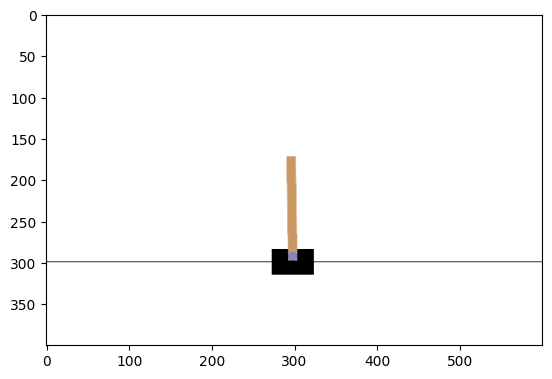

In [11]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gymnasium as gym

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v1", render_mode="rgb_array").env # так создается симулятор окружения

env.reset() # сбрасываем параметры симулятора (устанавливаем прошедшее всемя с начала эпизода на 0, накопленную награду на 0, сбрасываются параметры инерции)
n_actions = env.action_space.n # получаем количество возможных действий управления
state_dim = env.observation_space.shape[0] # получаем размерность вектора наблюдений
print('Выход функции step:', env.step(0)) #для того чтобы сделать шаг симуляции есть функция step, принимающая на вход действие и возвращающая следующее состояние, награду, индикатор окончания эпизода и дополнительную иннформацию
plt.imshow(env.render()) #render отрисовывает окружающую среду в формате пригодном для подачи в функцию imshow
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close() #останавливаем симуляцию

In [4]:
import os
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Напомним суть метода A2C:

Есть 2 нейронный сети: Actor и Critic. Critic - по-сути функция Беллмана, которую обучают под дискретное уравнение Беллмана.

Actor - политика, которую мы обучаем максимизировать функцию Беллмана.



In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Создайте 2 вышеупомянутые нейросети. Для нашей задачи хватит 2-3 линейных слоя в каждой. Так как пространство действий дискретно, вам  надо будет пробросить градиент через семплирование с вероятностями. В этом вам поможет torch.distributions.Categorical как возвращаемое значение Actor

In [40]:
class Actor(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=32):
        super(Actor, self).__init__()
        self.actor_network = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, action_size)
        )

    def forward(self, state):
        probs = F.softmax(self.actor_network(state), dim=-1)
        m = Categorical(probs)
        action = m.sample()
        return action, m.log_prob(action)


class Critic(nn.Module):
    def __init__(self, state_size, hidden_size):
        super(Critic, self).__init__()
        self.critic_network = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, state):
        return self.critic_network(state)


Теперь для удобства реализуем функцию compute_returns, вычисляющую значения Q - функции. На вход она получает список rewards наград, получаемых на каждом шаге куска траектории, next_value - выход критика в последнем состоянии таектории. При обучении мы будем последовательно генерировать кусок траектории фиксированной длины (из соображений удобства). На выходе вы должны получить оценку Q-функции. Нам никто не гарантирует что эпизод не закончится раньше чем закончится генерация траектории. Например, N = 20, а на 10 эпизоде у нас маятник уже упал. gymnasium в таком случае автоматически запускает новый эпизод и при следующем вызове step эпизод будет уже новый. Для этого, в функцию передается параметр dones, являющийся списком длины N, содержащий индикаторы того, завершился ли эпизод на соответствующем шаге. Соответственно, для оценок Q-функции на куске траектории, уже известной до последнего эпизода, прибавлять V-функцию не нужно, так как мы и так знаем все награды до самого конца.

Реализуйте функцию compute_returns.

In [24]:
@torch.no_grad()
def compute_Q(next_value, rewards, dones, gamma=0.99):
    q_function = []
    q_value = next_value
    for i in reversed(range(len(rewards))):
        q_value = q_value * gamma + rewards[i] if not dones[i] else rewards[i]
        q_function.append(q_value)
    return q_function[::-1]

Теперь реализуйте итерацию обучения. Напомним формулы:


$L_{actor} = -\frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N log(π(a_t^m|s_t^m))A(a_t^m, s_t^m)$

$L_{critic} = \frac{1}{MN} \sum_{m=0}^M \sum_{t=0}^N (V(s_t^m) - y(s_t^m, a_t^m))^2$

$y(s_t^m, a_t^m) = \sum_{t'=t}^{N-1} γ^{t'-t} r(s_{t'}, a_{t'}) + γ^{N-t} V(s_N) $

In [59]:
from IPython.display import clear_output, display

def trainIters(actor, critic, n_iters, iter_steps):
    #создайте оптимизаторы для Actor и Critic
    optimizerActor = optim.Adam(lr=0.001, params=actor.parameters())
    optimizerCritic = optim.Adam(lr=0.001, params=critic.parameters())
    actor.to(device)
    critic.to(device)
    actor.train()
    critic.train()

    for iter in range(n_iters):
        #обнулите окружение и получите первое состояние
        state, _ = env.reset()
        #переменные для накопления всего накапливаемого
        log_probs = []
        values = []
        rewards = []
        dones = []

        total_reward = 0.0
        #цикл по шагам в эпизоде
        for i in range(iter_steps):
            # clear_output(wait=True)

            # plt.imshow(env.render())
            # display(plt.gcf())  # Отображение текущей фигуры

            #получите действие и значение V - функции в текущем состоянии state
            state = torch.tensor(state, device=device)
            action, log_prob = actor(state)
            v_value = critic(state)

            #шаг симулятора
            next_state, reward, done, truncated, _ = env.step(action.item())

            total_reward += reward

            #накапливаем логарифмы вероятностей, значения v-функции, действия, награды, индикаторы завершения эпизода
            log_probs.append(log_prob) # torch list
            values.append(v_value) # torch list
            rewards.append(torch.tensor(reward, device=device)) # float list
            dones.append(torch.tensor(done, dtype=bool, device=device)) # float list

            #обновляем состояние
            state = next_state # numpy state

            if done:
                print('Iteration: {}, Score: {}, Total Reward: {}'.format(iter, i, total_reward))
                total_reward = 0.0
                state, _ = env.reset()

        #получите значение V - функции в последнем состоянии (параметр next_state)
        next_value = critic(torch.tensor(state, device=device))

        #вычислите Q-функции
        q_functions = compute_Q(next_value, rewards, dones)

        #вычислите advantage
        advantage = torch.tensor(q_functions, device=device) - torch.stack(values)
        #вычислите actor_loss
        actor_loss = -torch.mean(torch.stack(log_probs) * advantage.detach())
        #вычислите critic_loss
        critic_loss = torch.mean(advantage ** 2)

        #сделайте шаг оптимизации critic_loss и actor_loss
        optimizerActor.zero_grad()
        optimizerCritic.zero_grad()
        actor_loss.backward()
        critic_loss.backward()
        optimizerActor.step()
        optimizerCritic.step()

    torch.save(actor, 'actor.pkl')
    torch.save(critic, 'critic.pkl')
    env.close()

actor = Actor(state_size, action_size).to(device)
critic = Critic(state_size, action_size).to(device)
trainIters(actor, critic, n_iters=3000, iter_steps=300)

Iteration: 0, Score: 35, Total Reward: 36.0
Iteration: 0, Score: 65, Total Reward: 30.0
Iteration: 0, Score: 83, Total Reward: 18.0
Iteration: 0, Score: 98, Total Reward: 15.0
Iteration: 0, Score: 110, Total Reward: 12.0
Iteration: 0, Score: 129, Total Reward: 19.0
Iteration: 0, Score: 170, Total Reward: 41.0
Iteration: 0, Score: 179, Total Reward: 9.0
Iteration: 0, Score: 210, Total Reward: 31.0
Iteration: 0, Score: 235, Total Reward: 25.0
Iteration: 0, Score: 255, Total Reward: 20.0
Iteration: 0, Score: 287, Total Reward: 32.0
Iteration: 1, Score: 18, Total Reward: 19.0
Iteration: 1, Score: 28, Total Reward: 10.0
Iteration: 1, Score: 52, Total Reward: 24.0
Iteration: 1, Score: 99, Total Reward: 47.0
Iteration: 1, Score: 119, Total Reward: 20.0
Iteration: 1, Score: 180, Total Reward: 61.0
Iteration: 1, Score: 196, Total Reward: 16.0
Iteration: 1, Score: 210, Total Reward: 14.0
Iteration: 1, Score: 232, Total Reward: 22.0
Iteration: 1, Score: 244, Total Reward: 12.0
Iteration: 1, Score

Проверьте обученные сети. Награда после завершения эпизода должна быть стабильно больше 300. Можно менять количество эпох обучения

In [63]:
#для тестирования скопируйте цикл for из предыдущей ячейки сюда, удалите логгирования, замените range(N) на count() (тогда он будет бесконечно итерироваться) и в if done запихните break.
#Прогоните эпизод несколько раз

def eval(actor, critic, n_iters):
    #создайте оптимизаторы для Actor и Critic
    actor.to(device)
    critic.to(device)
    actor.eval()
    critic.eval()

    for iter in range(n_iters):
        #обнулите окружение и получите первое состояние
        state, _ = env.reset()
        total_reward = 0.0

        #цикл по шагам в эпизоде
        for i in count():
            #получите действие и значение V - функции в текущем состоянии state
            state = torch.tensor(state, device=device)
            action, log_prob = actor(state)
            v_value = critic(state)
            #шаг симулятора
            next_state, reward, done, truncated, _ = env.step(action.item())
            total_reward += reward
            #обновляем состояние
            state = next_state # numpy state
            if done:
                print('Iteration: {}, Score: {}, Total Reward: {}'.format(iter, i, total_reward))
                total_reward = 0.0
                break
    env.close()

eval(actor, critic, 10)

Iteration: 0, Score: 3783, Total Reward: 3784.0
Iteration: 1, Score: 26710, Total Reward: 26711.0
Iteration: 2, Score: 8543, Total Reward: 8544.0
Iteration: 3, Score: 791, Total Reward: 792.0
Iteration: 4, Score: 10213, Total Reward: 10214.0
Iteration: 5, Score: 15494, Total Reward: 15495.0
Iteration: 6, Score: 1934, Total Reward: 1935.0
Iteration: 7, Score: 4621, Total Reward: 4622.0
Iteration: 8, Score: 17376, Total Reward: 17377.0
Iteration: 9, Score: 6560, Total Reward: 6561.0


Реализуем функцию для записи траекторий.

In [64]:
def generate_session(env, agent, t_max=1000):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()[0]

    for t in range(t_max):
        a, _ = agent(torch.tensor(s, device=device))

        new_s, r, terminated, truncated, _ = env.step(a.item())

        # накаливаем траекторию
        states.append(s)
        actions.append(a)
        total_reward += r

        s = new_s
        if terminated or truncated:
            break
    return states, actions, total_reward

Запишем видео работы сетей (парочку видео приложите в  энитаск)

In [65]:
from gymnasium.wrappers import RecordVideo

with RecordVideo(
    env=gym.make("CartPole-v0", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, actor) for _ in range(100)]

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1.mp4
Moviepy - Building video /content/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-2.mp4
Moviepy - Building video /content/videos/rl-video-episode-3.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-3.mp4
Moviepy - Building video /content/videos/rl-video-episode-4.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-4.mp4
Moviepy - Building video /content/videos/rl-video-episode-5.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-5.mp4
Moviepy - Building video /content/videos/rl-video-episode-6.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-6.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-6.mp4
Moviepy - Building video /content/videos/rl-video-episode-7.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-7.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-7.mp4
Moviepy - Building video /content/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-8.mp4
Moviepy - Building video /content/videos/rl-video-episode-9.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-9.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-9.mp4
Moviepy - Building video /content/videos/rl-video-episode-10.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-10.mp4
Moviepy - Building video /content/videos/rl-video-episode-11.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-11.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-11.mp4
Moviepy - Building video /content/videos/rl-video-episode-12.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-12.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-12.mp4
Moviepy - Building video /content/videos/rl-video-episode-13.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-13.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-13.mp4
Moviepy - Building video /content/videos/rl-video-episode-14.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-14.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-14.mp4
Moviepy - Building video /content/videos/rl-video-episode-15.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-15.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-15.mp4
Moviepy - Building video /content/videos/rl-video-episode-16.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-16.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-16.mp4
Moviepy - Building video /content/videos/rl-video-episode-17.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-17.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-17.mp4
Moviepy - Building video /content/videos/rl-video-episode-18.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-18.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-18.mp4
Moviepy - Building video /content/videos/rl-video-episode-19.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-19.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-19.mp4
Moviepy - Building video /content/videos/rl-video-episode-20.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-20.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-20.mp4
Moviepy - Building video /content/videos/rl-video-episode-21.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-21.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-21.mp4
Moviepy - Building video /content/videos/rl-video-episode-22.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-22.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-22.mp4
Moviepy - Building video /content/videos/rl-video-episode-23.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-23.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-23.mp4
Moviepy - Building video /content/videos/rl-video-episode-24.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-24.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-24.mp4
Moviepy - Building video /content/videos/rl-video-episode-25.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-25.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-25.mp4
Moviepy - Building video /content/videos/rl-video-episode-26.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-26.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-26.mp4
Moviepy - Building video /content/videos/rl-video-episode-27.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-27.mp4
Moviepy - Building video /content/videos/rl-video-episode-28.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-28.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-28.mp4
Moviepy - Building video /content/videos/rl-video-episode-29.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-29.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-29.mp4
Moviepy - Building video /content/videos/rl-video-episode-30.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-30.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-30.mp4
Moviepy - Building video /content/videos/rl-video-episode-31.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-31.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-31.mp4
Moviepy - Building video /content/videos/rl-video-episode-32.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-32.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-32.mp4
Moviepy - Building video /content/videos/rl-video-episode-33.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-33.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-33.mp4
Moviepy - Building video /content/videos/rl-video-episode-34.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-34.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-34.mp4
Moviepy - Building video /content/videos/rl-video-episode-35.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-35.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-35.mp4
Moviepy - Building video /content/videos/rl-video-episode-36.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-36.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-36.mp4
Moviepy - Building video /content/videos/rl-video-episode-37.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-37.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-37.mp4
Moviepy - Building video /content/videos/rl-video-episode-38.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-38.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-38.mp4
Moviepy - Building video /content/videos/rl-video-episode-39.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-39.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-39.mp4
Moviepy - Building video /content/videos/rl-video-episode-40.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-40.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-40.mp4
Moviepy - Building video /content/videos/rl-video-episode-41.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-41.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-41.mp4
Moviepy - Building video /content/videos/rl-video-episode-42.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-42.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-42.mp4
Moviepy - Building video /content/videos/rl-video-episode-43.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-43.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-43.mp4
Moviepy - Building video /content/videos/rl-video-episode-44.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-44.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-44.mp4
Moviepy - Building video /content/videos/rl-video-episode-45.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-45.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-45.mp4
Moviepy - Building video /content/videos/rl-video-episode-46.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-46.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-46.mp4
Moviepy - Building video /content/videos/rl-video-episode-47.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-47.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-47.mp4
Moviepy - Building video /content/videos/rl-video-episode-48.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-48.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-48.mp4
Moviepy - Building video /content/videos/rl-video-episode-49.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-49.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-49.mp4
Moviepy - Building video /content/videos/rl-video-episode-50.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-50.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-50.mp4
Moviepy - Building video /content/videos/rl-video-episode-51.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-51.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-51.mp4
Moviepy - Building video /content/videos/rl-video-episode-52.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-52.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-52.mp4
Moviepy - Building video /content/videos/rl-video-episode-53.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-53.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-53.mp4
Moviepy - Building video /content/videos/rl-video-episode-54.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-54.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-54.mp4
Moviepy - Building video /content/videos/rl-video-episode-55.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-55.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-55.mp4
Moviepy - Building video /content/videos/rl-video-episode-56.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-56.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-56.mp4
Moviepy - Building video /content/videos/rl-video-episode-57.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-57.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-57.mp4
Moviepy - Building video /content/videos/rl-video-episode-58.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-58.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-58.mp4
Moviepy - Building video /content/videos/rl-video-episode-59.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-59.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-59.mp4
Moviepy - Building video /content/videos/rl-video-episode-60.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-60.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-60.mp4
Moviepy - Building video /content/videos/rl-video-episode-61.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-61.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-61.mp4
Moviepy - Building video /content/videos/rl-video-episode-62.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-62.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-62.mp4
Moviepy - Building video /content/videos/rl-video-episode-63.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-63.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-63.mp4
Moviepy - Building video /content/videos/rl-video-episode-64.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-64.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-64.mp4
Moviepy - Building video /content/videos/rl-video-episode-65.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-65.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-65.mp4
Moviepy - Building video /content/videos/rl-video-episode-66.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-66.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-66.mp4
Moviepy - Building video /content/videos/rl-video-episode-67.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-67.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-67.mp4
Moviepy - Building video /content/videos/rl-video-episode-68.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-68.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-68.mp4
Moviepy - Building video /content/videos/rl-video-episode-69.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-69.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-69.mp4
Moviepy - Building video /content/videos/rl-video-episode-70.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-70.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-70.mp4
Moviepy - Building video /content/videos/rl-video-episode-71.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-71.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-71.mp4
Moviepy - Building video /content/videos/rl-video-episode-72.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-72.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-72.mp4
Moviepy - Building video /content/videos/rl-video-episode-73.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-73.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-73.mp4
Moviepy - Building video /content/videos/rl-video-episode-74.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-74.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-74.mp4
Moviepy - Building video /content/videos/rl-video-episode-75.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-75.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-75.mp4
Moviepy - Building video /content/videos/rl-video-episode-76.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-76.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-76.mp4
Moviepy - Building video /content/videos/rl-video-episode-77.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-77.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-77.mp4
Moviepy - Building video /content/videos/rl-video-episode-78.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-78.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-78.mp4
Moviepy - Building video /content/videos/rl-video-episode-79.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-79.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-79.mp4
Moviepy - Building video /content/videos/rl-video-episode-80.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-80.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-80.mp4
Moviepy - Building video /content/videos/rl-video-episode-81.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-81.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-81.mp4
Moviepy - Building video /content/videos/rl-video-episode-82.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-82.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-82.mp4
Moviepy - Building video /content/videos/rl-video-episode-83.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-83.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-83.mp4
Moviepy - Building video /content/videos/rl-video-episode-84.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-84.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-84.mp4
Moviepy - Building video /content/videos/rl-video-episode-85.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-85.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-85.mp4
Moviepy - Building video /content/videos/rl-video-episode-86.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-86.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-86.mp4
Moviepy - Building video /content/videos/rl-video-episode-87.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-87.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-87.mp4
Moviepy - Building video /content/videos/rl-video-episode-88.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-88.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-88.mp4
Moviepy - Building video /content/videos/rl-video-episode-89.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-89.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-89.mp4
Moviepy - Building video /content/videos/rl-video-episode-90.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-90.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-90.mp4
Moviepy - Building video /content/videos/rl-video-episode-91.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-91.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-91.mp4
Moviepy - Building video /content/videos/rl-video-episode-92.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-92.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-92.mp4
Moviepy - Building video /content/videos/rl-video-episode-93.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-93.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-93.mp4
Moviepy - Building video /content/videos/rl-video-episode-94.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-94.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-94.mp4
Moviepy - Building video /content/videos/rl-video-episode-95.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-95.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-95.mp4
Moviepy - Building video /content/videos/rl-video-episode-96.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-96.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-96.mp4
Moviepy - Building video /content/videos/rl-video-episode-97.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-97.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-97.mp4
Moviepy - Building video /content/videos/rl-video-episode-98.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-98.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-98.mp4
Moviepy - Building video /content/videos/rl-video-episode-99.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-99.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-99.mp4
